In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
customers_df = pd.read_csv(r"C:\Users\THAKALI\Downloads\Customers (2).csv")
products_df = pd.read_csv(r"C:\Users\THAKALI\Downloads\Products (2).csv")
transactions_df = pd.read_csv(r"C:\Users\THAKALI\Downloads\Transactions (2).csv")


In [27]:
print("\nCustomers Data Info:")
print(customers_df.info())
print("\nProducts Data Info:")
print(products_df.info())
print("\nTransactions Data Info:")
print(transactions_df.info())



Customers Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column   

In [28]:
print("\nSample Customers Data:")
print(customers_df.head())
print("\nSample Products Data:")
print(products_df.head())
print("\nSample Transactions Data:")
print(transactions_df.head())



Sample Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Sample Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Sample Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2    

In [29]:
print("\nMissing values in Customers:")
print(customers_df.isnull().sum())
print("\nMissing values in Products:")
print(products_df.isnull().sum())
print("\nMissing values in Transactions:")
print(transactions_df.isnull().sum())


Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [30]:
customers_df.drop_duplicates(inplace=True)
products_df.drop_duplicates(inplace=True)
transactions_df.drop_duplicates(inplace=True)

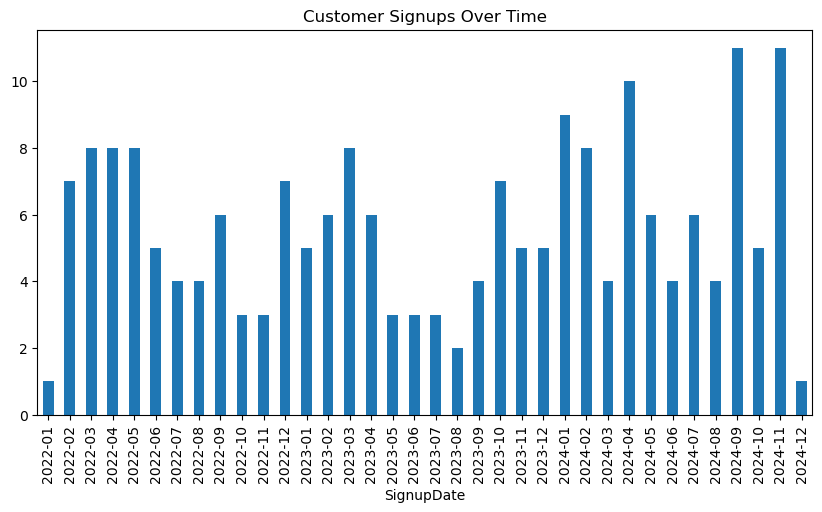

In [31]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customer_signups = customers_df.groupby(customers_df['SignupDate'].dt.to_period('M')).size()
customer_signups.plot(kind='bar', figsize=(10, 5), title='Customer Signups Over Time')
plt.show()

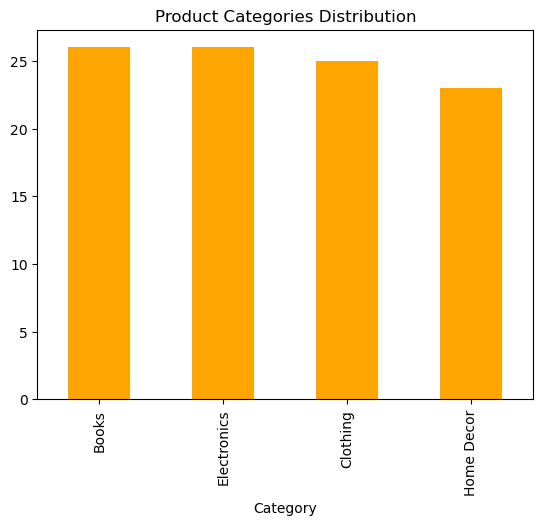

In [32]:
product_category_counts = products_df['Category'].value_counts()
product_category_counts.plot(kind='bar', title='Product Categories Distribution', color='orange')
plt.show()

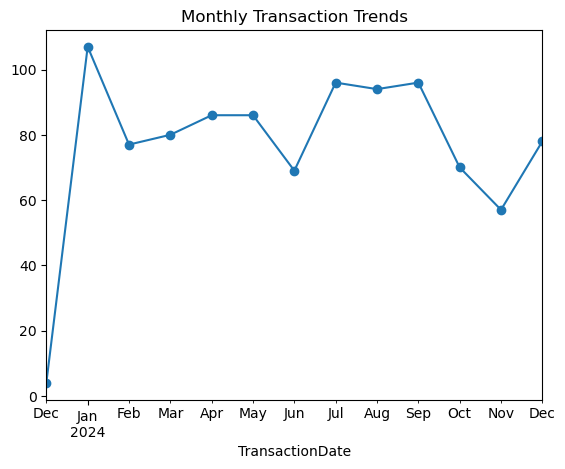

In [33]:
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
monthly_transactions = transactions_df.groupby(transactions_df['TransactionDate'].dt.to_period('M')).size()
monthly_transactions.plot(kind='line', title='Monthly Transaction Trends', marker='o')
plt.show()

In [34]:
correlation = transactions_df[['Price', 'TotalValue']].corr()
print("\nCorrelation between Price and TotalValue:")
print(correlation)


Correlation between Price and TotalValue:
               Price  TotalValue
Price       1.000000    0.722714
TotalValue  0.722714    1.000000


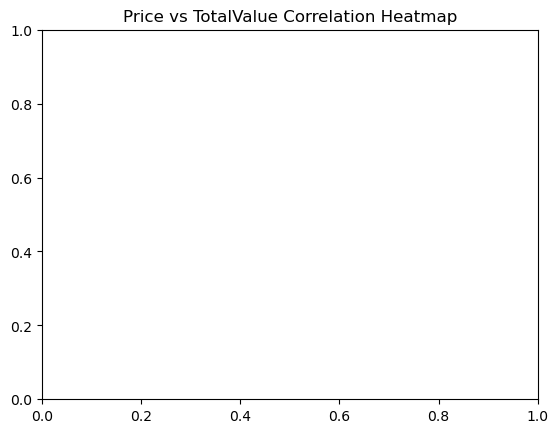

In [35]:
plt.title('Price vs TotalValue Correlation Heatmap')
plt.show()

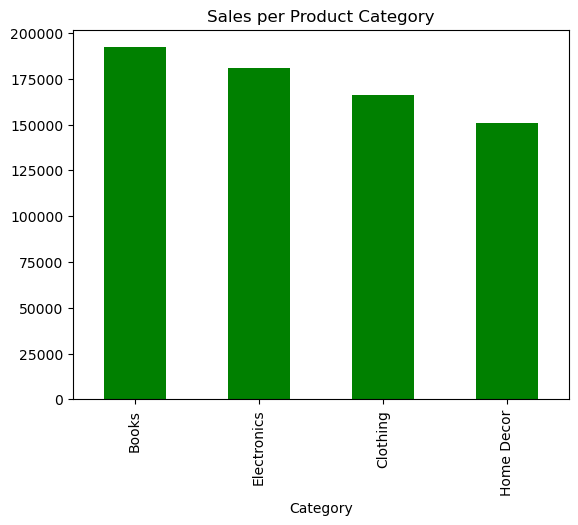

In [36]:
merged_df = pd.merge(transactions_df, products_df, on='ProductID', how='left')
sales_per_category = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
sales_per_category.plot(kind='bar', title='Sales per Product Category', color='green')
plt.show()